In [1]:
import tweepy
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Set a list of targeted accounts; set the latest tweet id; set count of plots.
target_accounts = []
id = None
p_count = 0
def plotbot(counter):
    # Search for all new mentions.
    global id
    global p_count
    mentions = api.search("@plotbot", since_id=id)
    # For the results, retrieve data starting from the oldest tweet.
    for i in range(len(mentions["statuses"])):
        target_account = mentions["statuses"][-i-1]["entities"]["user_mentions"][1]["screen_name"]
        user = mentions["statuses"][-i-1]["user"]["screen_name"]
        id = mentions["statuses"][-i-1]["id"]
        # Check if targeted account has been analyzed before.
        if target_account in target_accounts:
            print(f"@{target_account} has previously been analyzed.")
        else:
            target_accounts.append(target_account)
            scores = []
            t_count = 0
            tweets_ago = []
            for x in range(1,26):
                tweets = api.user_timeline(target_account, page=x)
                for tweet in tweets:
                    score = analyzer.polarity_scores(tweet["text"])["compound"]
                    scores.append(score)
                    t_count += -1
                    tweets_ago.append(t_count)
            p_count += 1
            plt.style.use("seaborn-darkgrid")
            plt.figure(figsize=(10,7.5))
            plt.plot(tweets_ago, scores, alpha=.8, marker="o", lw=.5, label=f"@{target_account}")
            plt.title(f"Sentiment Analysis of Tweets ({datetime.today().strftime('%m/%d/%y')})", size=20)
            plt.xlabel("Tweets Ago", size=20)
            plt.ylabel("Tweet Polarity", size=20)
            plt.xticks(size=15)
            plt.yticks(size=15)
            leg = plt.legend(loc="upper right", bbox_to_anchor=(1.25,1), fontsize=15)
            leg.set_title("Tweets", prop={"size": 20})
            plt.savefig(f"plot{p_count}", bbox_inches="tight")
            api.update_with_media(f"plot{p_count}.png", f"New Tweet Analysis: @{target_account} (Thx @{user}!!!)")
            print(f"Analysis of @{target_account} (plot{p_count}) posted.")

Bot starts for Round 1.
Analysis of @CNN (plot1) posted.
Analysis of @nytimes (plot2) posted.
Bot starts for Round 2.
@CNN has previously been analyzed.
Analysis of @realDonaldTrump (plot3) posted.


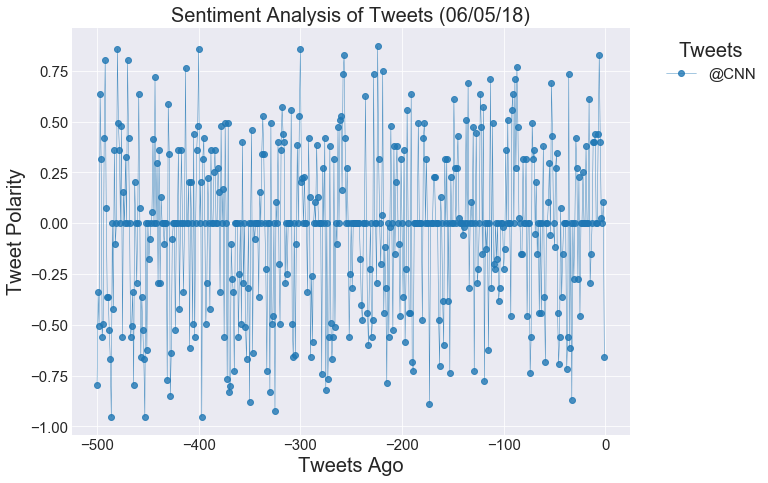

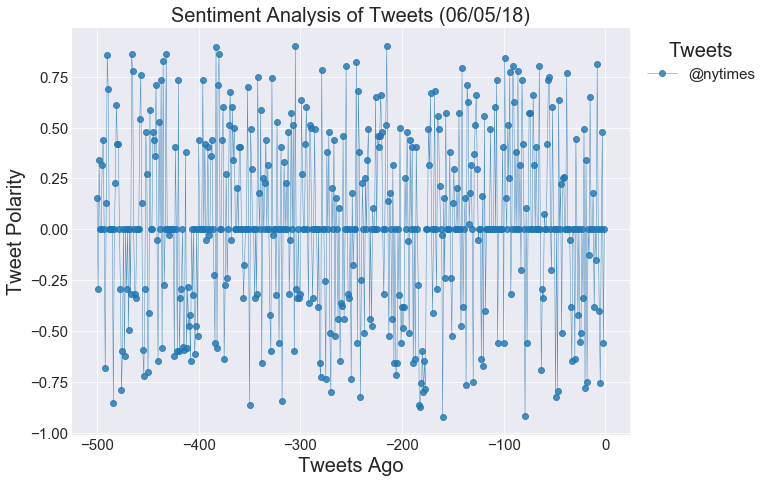

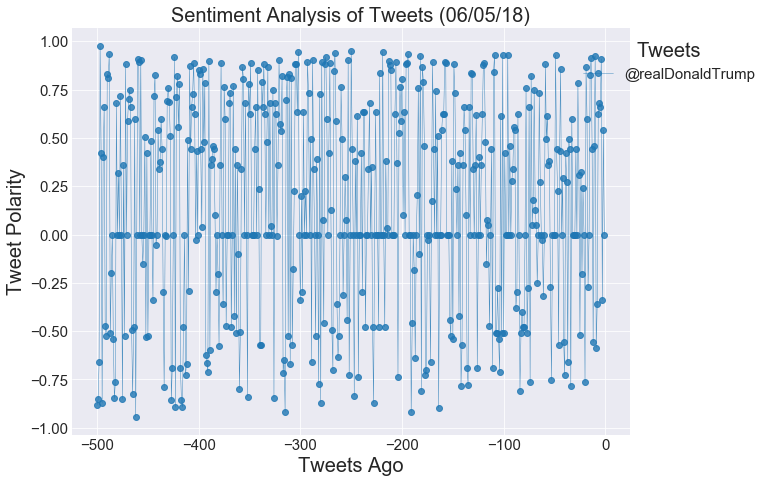

In [4]:
counter = 1
while True:
    print(f"Bot starts for Round {counter}.")
    plotbot(counter)
    if p_count == 3:
        break
    else:
        counter += 1
        time.sleep(300)